In [47]:
import os.path

import matplotlib.pyplot as plt
import pandas as pd
import scmdata
import scmdata.database
import xarray as xr

In [19]:
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["axes.xmargin"] = 0

In [80]:
magicc_gsat_output = []
for sd in ("submission-database", "submission-database-hadcrut5-target"):
    magicc_output_dir = os.path.join(
        ".",
        "rcmip-phase-2-archive",
        "rcmip-phase-2",
        "data",
        "processed",
        sd
    )
    db = scmdata.database.ScmDatabase(magicc_output_dir)
    magicc_gsat_output_db = scmdata.run_append([
        db.load(scenario=s, variable="Surface Air Temperature Change") for s in ["ssp245"]
    ])
    magicc_target = "HadCRUT5" if "hadcrut5" in sd else "HadCRUT4"
    magicc_gsat_output_db["source"] = magicc_gsat_output_db["climate_model"] + " {} calibrated".format(magicc_target)
    display(magicc_gsat_output_db)
    magicc_gsat_output.append(magicc_gsat_output_db)
    
magicc_gsat_output = scmdata.run_append(magicc_gsat_output)
magicc_gsat_output

Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

<scmdata.ScmRun (timeseries: 600, timepoints: 456)>
Time:
	Start: 1850-01-01T00:00:00
	End: 2305-01-01T00:00:00
Meta:
	    climate_model  ensemble_member        model region scenario  \
	0    MAGICCv7.5.1                0  unspecified  World   ssp245   
	1    MAGICCv7.5.1                1  unspecified  World   ssp245   
	2    MAGICCv7.5.1                2  unspecified  World   ssp245   
	3    MAGICCv7.5.1                3  unspecified  World   ssp245   
	4    MAGICCv7.5.1                4  unspecified  World   ssp245   
	..            ...              ...          ...    ...      ...   
	595  MAGICCv7.5.1              595  unspecified  World   ssp245   
	596  MAGICCv7.5.1              596  unspecified  World   ssp245   
	597  MAGICCv7.5.1              597  unspecified  World   ssp245   
	598  MAGICCv7.5.1              598  unspecified  World   ssp245   
	599  MAGICCv7.5.1              599  unspecified  World   ssp245   
	
	                               source unit                     

Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/mesmer-openscmrunner/lib/python3.9/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


<scmdata.ScmRun (timeseries: 600, timepoints: 456)>
Time:
	Start: 1850-01-01T00:00:00
	End: 2305-01-01T00:00:00
Meta:
	    climate_model  ensemble_member        model region scenario  \
	0    MAGICCv7.5.1                0  unspecified  World   ssp245   
	1    MAGICCv7.5.1                1  unspecified  World   ssp245   
	2    MAGICCv7.5.1                2  unspecified  World   ssp245   
	3    MAGICCv7.5.1                3  unspecified  World   ssp245   
	4    MAGICCv7.5.1                4  unspecified  World   ssp245   
	..            ...              ...          ...    ...      ...   
	595  MAGICCv7.5.1              595  unspecified  World   ssp245   
	596  MAGICCv7.5.1              596  unspecified  World   ssp245   
	597  MAGICCv7.5.1              597  unspecified  World   ssp245   
	598  MAGICCv7.5.1              598  unspecified  World   ssp245   
	599  MAGICCv7.5.1              599  unspecified  World   ssp245   
	
	                               source unit                     

<scmdata.ScmRun (timeseries: 1200, timepoints: 456)>
Time:
	Start: 1850-01-01T00:00:00
	End: 2305-01-01T00:00:00
Meta:
	     climate_model  ensemble_member        model region scenario  \
	0     MAGICCv7.5.1                0  unspecified  World   ssp245   
	1     MAGICCv7.5.1                1  unspecified  World   ssp245   
	2     MAGICCv7.5.1                2  unspecified  World   ssp245   
	3     MAGICCv7.5.1                3  unspecified  World   ssp245   
	4     MAGICCv7.5.1                4  unspecified  World   ssp245   
	...            ...              ...          ...    ...      ...   
	1195  MAGICCv7.5.1              595  unspecified  World   ssp245   
	1196  MAGICCv7.5.1              596  unspecified  World   ssp245   
	1197  MAGICCv7.5.1              597  unspecified  World   ssp245   
	1198  MAGICCv7.5.1              598  unspecified  World   ssp245   
	1199  MAGICCv7.5.1              599  unspecified  World   ssp245   
	
	                                source unit       

In [62]:
!wget https://www.metoffice.gov.uk/hadobs/hadcrut4/data/current/time_series/HadCRUT.4.6.0.0.annual_ns_avg.txt

--2021-05-06 11:53:56--  https://www.metoffice.gov.uk/hadobs/hadcrut4/data/current/time_series/HadCRUT.4.6.0.0.annual_ns_avg.txt
Resolving www.metoffice.gov.uk (www.metoffice.gov.uk)... 104.97.224.121
Connecting to www.metoffice.gov.uk (www.metoffice.gov.uk)|104.97.224.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17888 (17K) [text/plain]
Saving to: 'HadCRUT.4.6.0.0.annual_ns_avg.txt.1’

HadCRUT.4.6.0.0.ann 100%[===================>]  17.47K  --.-KB/s    in 0s      

2021-05-06 11:53:56 (199 MB/s) - 'HadCRUT.4.6.0.0.annual_ns_avg.txt.1’ saved [17888/17888]



In [63]:
hadcrut4_median = pd.read_csv(
    "HadCRUT.4.6.0.0.annual_ns_avg.txt", 
    delim_whitespace=True, 
    index_col=0,
    header=None,
).iloc[:, 0]
hadcrut4_median

0
1850   -0.373
1851   -0.218
1852   -0.228
1853   -0.269
1854   -0.248
        ...  
2017    0.677
2018    0.597
2019    0.736
2020    0.768
2021    0.539
Name: 1, Length: 172, dtype: float64

In [85]:
hadcrut4 = scmdata.ScmRun(
    data=hadcrut4_median.values,
    index=hadcrut4_median.index,
    columns={
        "model": "model",
        "scenario": "scenario",
        "region": "World",
        "source": "HadCRUT.4.6.0.0",
        "unit": "K",
        "variable": "GMST",
        "ensemble_member": 0,
    }
).filter(year=range(1, 2020 + 1))
hadcrut4

<scmdata.ScmRun (timeseries: 1, timepoints: 171)>
Time:
	Start: 1850-01-01T00:00:00
	End: 2020-01-01T00:00:00
Meta:
	   ensemble_member  model region  scenario           source unit variable
	0                0  model  World  scenario  HadCRUT.4.6.0.0    K     GMST

In [65]:
!wget http://berkeleyearth.lbl.gov/auto/Global/Land_and_Ocean_summary.txt

--2021-05-06 11:53:56--  http://berkeleyearth.lbl.gov/auto/Global/Land_and_Ocean_summary.txt
Resolving berkeleyearth.lbl.gov (berkeleyearth.lbl.gov)... 128.3.29.26
Connecting to berkeleyearth.lbl.gov (berkeleyearth.lbl.gov)|128.3.29.26|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25192 (25K) [text/plain]
Saving to: 'Land_and_Ocean_summary.txt.1’

Land_and_Ocean_summ 100%[===================>]  24.60K   129KB/s    in 0.2s    

2021-05-06 11:53:57 (129 KB/s) - 'Land_and_Ocean_summary.txt.1’ saved [25192/25192]



In [66]:
best_land_ocean_above_sea_ice_temp_median = pd.read_csv(
    "Land_and_Ocean_summary.txt", 
    delim_whitespace=True, 
    index_col=0,
    header=None,
    skiprows=58,
).iloc[:, 0]
best_land_ocean_above_sea_ice_temp_median

0
1850   -0.405
1851   -0.285
1852   -0.257
1853   -0.269
1854   -0.272
        ...  
2016    1.058
2017    0.964
2018    0.891
2019    1.027
2020    1.053
Name: 1, Length: 171, dtype: float64

In [67]:
best = scmdata.ScmRun(
    data=best_land_ocean_above_sea_ice_temp_median.values,
    index=best_land_ocean_above_sea_ice_temp_median.index,
    columns={
        "model": "model",
        "scenario": "scenario",
        "region": "World",
        "source": "BEST-20210414",
        "unit": "K",
        "variable": "GMST",
        "ensemble_member": 0,
    }
)
best

<scmdata.ScmRun (timeseries: 1, timepoints: 171)>
Time:
	Start: 1850-01-01T00:00:00
	End: 2020-01-01T00:00:00
Meta:
	   ensemble_member  model region  scenario         source unit variable
	0                0  model  World  scenario  BEST-20210414    K     GMST

In [68]:
!wget https://www.metoffice.gov.uk/hadobs/hadcrut5/data/current/analysis/diagnostics/HadCRUT.5.0.1.0.analysis.summary_series.global.annual.nc

--2021-05-06 11:53:57--  https://www.metoffice.gov.uk/hadobs/hadcrut5/data/current/analysis/diagnostics/HadCRUT.5.0.1.0.analysis.summary_series.global.annual.nc
Resolving www.metoffice.gov.uk (www.metoffice.gov.uk)... 104.97.224.121
Connecting to www.metoffice.gov.uk (www.metoffice.gov.uk)|104.97.224.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34810 (34K) [application/x-netcdf]
Saving to: 'HadCRUT.5.0.1.0.analysis.summary_series.global.annual.nc.1’

HadCRUT.5.0.1.0.ana 100%[===================>]  33.99K  --.-KB/s    in 0.001s  

2021-05-06 11:53:57 (64.1 MB/s) - 'HadCRUT.5.0.1.0.analysis.summary_series.global.annual.nc.1’ saved [34810/34810]



In [69]:
hadcrut5_raw = xr.load_dataset("HadCRUT.5.0.1.0.analysis.summary_series.global.annual.nc")
hadcrut5_raw

<xarray.Dataset>
Dimensions:           (bnds: 2, time: 172)
Coordinates:
  * time              (time) datetime64[ns] 1850-07-02T12:00:00 ... 2021-07-0...
    latitude          float64 0.0
    longitude         float64 0.0
    realization       int64 100
Dimensions without coordinates: bnds
Data variables:
    tas_mean          (time) float64 -0.4177 -0.2333 -0.2294 ... 0.9228 0.7013
    time_bnds         (time, bnds) datetime64[ns] 1850-01-01 ... 2022-01-01
    latitude_bnds     (bnds) float64 -90.0 90.0
    longitude_bnds    (bnds) float64 -180.0 180.0
    realization_bnds  (bnds) int64 1 200
    tas_lower         (time) float64 -0.5892 -0.4119 -0.4094 ... 0.8882 0.4484
    tas_upper         (time) float64 -0.2461 -0.05483 -0.04942 ... 0.9574 0.9542
Attributes:
    comment:      2m air temperature over land blended with sea water tempera...
    history:      
    institution:  Met Office Hadley Centre / Climatic Research Unit, Universi...
    licence:      HadCRUT5 is licensed under the Open Government Licence v3.0...
    reference:    C. P. Morice, J. J. Kennedy, N. A. Rayner, J. P. Winn, E. H...
    source:       CRUTEM.5.0.1.0 HadSST.4.0.0.0
    title:        HadCRUT.5.0.1.0 blended land air temperature and sea-surfac...
    version:      HadCRUT.5.0.1.0
    Conventions:  CF-1.7

In [86]:
hadcrut5 = scmdata.ScmRun(
    data=hadcrut5_raw["tas_mean"].values,
    index=hadcrut5_raw["time"].values,
    columns={
        "model": "model",
        "scenario": "scenario",
        "region": "World",
        "source": "HadCRUT.5.0.1.0",
        "unit": "K",
        "variable": "GMST",
        "ensemble_member": 0,
    }
).filter(year=range(1, 2020 + 1))
hadcrut5

<scmdata.ScmRun (timeseries: 1, timepoints: 171)>
Time:
	Start: 1850-07-02T12:00:00
	End: 2020-07-02T00:00:00
Meta:
	   ensemble_member  model region  scenario           source unit variable
	0                0  model  World  scenario  HadCRUT.5.0.1.0    K     GMST

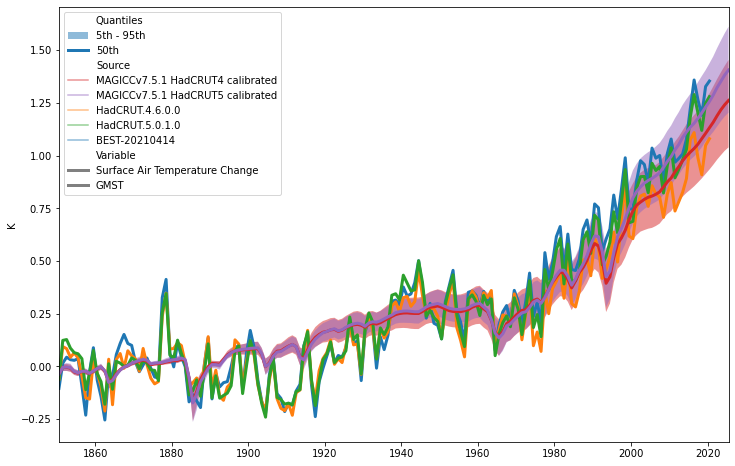

In [87]:
pdf = scmdata.run_append([magicc_gsat_output, hadcrut4, hadcrut5, best]).time_mean("AC")
ax = pdf.relative_to_ref_period_mean(year=range(1850, 1900 + 1)).filter(year=range(1850, 2026)).plumeplot(
    hue_var="source",
    hue_label="Source",
    dashes={
        "Surface Air Temperature Change": "-",
        "GMST": "-",
    },
    linewidth=3,
)